In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
g = nx.DiGraph({1:[2,3,4],2:[3]})

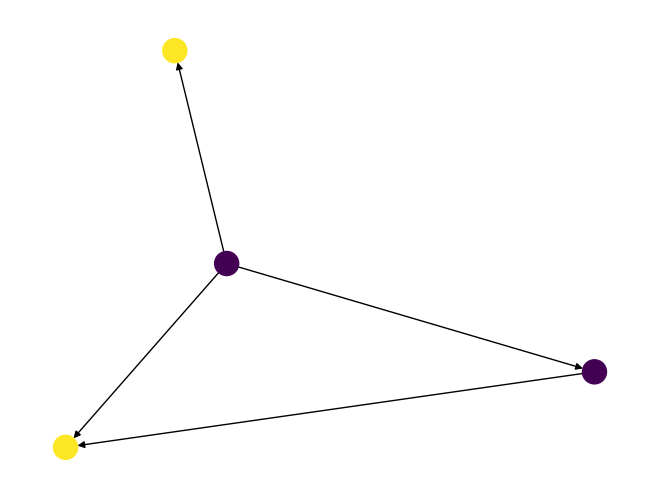

In [3]:
pos = nx.spring_layout(g)
nx.draw(g, pos,node_color=[1,1,2,2])
plt.show()

In [4]:
g.out_degree([1,2,3,4])

OutDegreeView({1: 3, 2: 1, 3: 0, 4: 0})

In [5]:
import numpy as np

In [6]:
np.empty([2, 2,2])

array([[[ 10.,  10.],
        [650.,  10.]],

       [[ 10., 490.],
        [650., 490.]]])

In [7]:
from itertools import product

In [8]:
list(product(*[[1],['a','b','c']]))

[(1, 'a'), (1, 'b'), (1, 'c')]

In [9]:
list(map(lambda x: list(product(*x)), [[[1,2,3],['a','b','c']],[[1,2,3],['a','b','c']]]))

[[(1, 'a'),
  (1, 'b'),
  (1, 'c'),
  (2, 'a'),
  (2, 'b'),
  (2, 'c'),
  (3, 'a'),
  (3, 'b'),
  (3, 'c')],
 [(1, 'a'),
  (1, 'b'),
  (1, 'c'),
  (2, 'a'),
  (2, 'b'),
  (2, 'c'),
  (3, 'a'),
  (3, 'b'),
  (3, 'c')]]

In [14]:
from Game_class import DiGraph
from Game_class import Game

In [178]:
a = DiGraph({1:[2,3,4],2:[3],3:[],4:[]},{1:0,2:1,3:0,4:1})

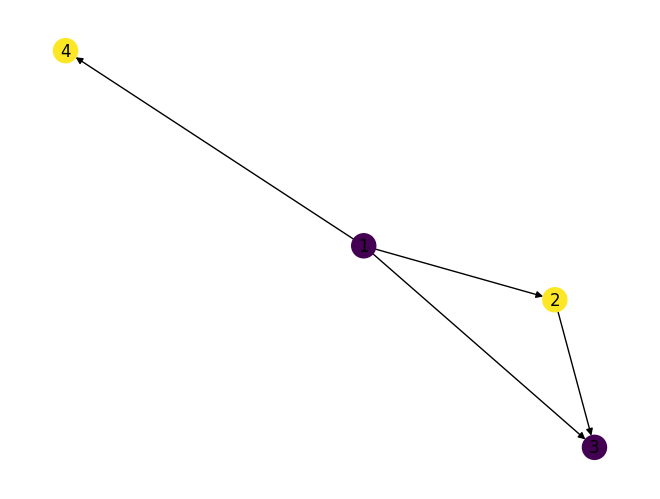

In [179]:
a.demonstrate(with_labels=True)

In [107]:
from importlib import reload
import Game_class
import useful_funcs
reload(useful_funcs)
reload(Game_class)

[1 2 4 5]


<module 'Game_class' from '/Users/dtikhanovskii/Documents/Graph-Game/Game_class.py'>

In [321]:
reload(useful_funcs)
reload(Game_class)

<module 'Game_class' from '/Users/dtikhanovskii/Documents/Graph-Game/Game_class.py'>

In [322]:
g = Game_class.Game(a, 1)

{0: [((1, 2),), ((1, 3),)], 1: [((2, 4), (4, 3)), ((2, 4), (4, 6)), ((2, 5), (4, 3)), ((2, 5), (4, 6))], 2: [((3, 4),), ((3, 7),)]}
[[[-1.  7.]
  [ 6.  6.]
  [ 5.  5.]
  [ 5.  5.]]

 [[-1.  7.]
  [ 6.  7.]
  [-1.  7.]
  [ 6.  7.]]]


In [311]:
g.make_CNF()

In [323]:
a = DiGraph({1:[2,3],2:[4,5],3:[4,7],4:[3,6],5:[],6:[],7:[]},{1:0,2:1,3:2,4:1,5:0,6:0,7:0})

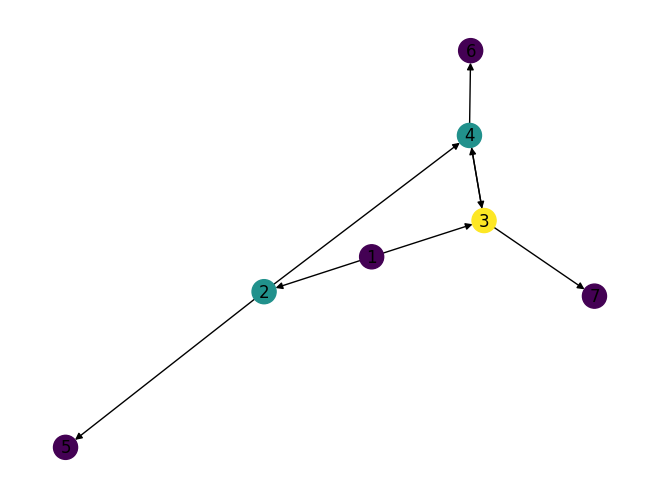

In [324]:
a.demonstrate(with_labels=True)

In [325]:
g = Game_class.Game(a, 1)

{0: [((1, 2),), ((1, 3),)], 1: [((2, 4), (4, 3)), ((2, 4), (4, 6)), ((2, 5), (4, 3)), ((2, 5), (4, 6))], 2: [((3, 4),), ((3, 7),)]}
[[[-1.  7.]
  [ 6.  6.]
  [ 5.  5.]
  [ 5.  5.]]

 [[-1.  7.]
  [ 6.  7.]
  [-1.  7.]
  [ 6.  7.]]]


In [326]:
g.make_CNF()

In [327]:
from pysat.solvers import Solver

# create a satisfiable CNF formula "(-x1 ∨ x2) ∧ (-x1 ∨ -x2)":

# create a SAT solver for this formula:
with Solver(bootstrap_with=g.make_CNF().clauses) as solver:
    # 1.1 call the solver for this formula:
    print('formula is', f'{"s" if solver.solve() else "uns"}atisfiable')

    # 1.2 the formula is satisfiable and so has a model:
    print('and the model is:', solver.get_model())

    # 2.1 apply the MiniSat-like assumption interface:
    print('formula is',
        f'{"s" if solver.solve(assumptions=[1, 2]) else "uns"}atisfiable',
        'assuming x1 and x2')

    # 2.2 the formula is unsatisfiable,
    # i.e. an unsatisfiable core can be extracted:
    print('and the unsatisfiable core is:', solver.get_core())

formula is satisfiable
and the model is: [-1, -2, 3, -4, -5, 6, 7, 8, 9, -10, -11, -12, 13, -14, 15, 16, -17, -18]
formula is unsatisfiable assuming x1 and x2
and the unsatisfiable core is: [1]


In [320]:
g.compares_codes

{(1, -1.0, 5.0): 1,
 (1, -1.0, 6.0): 2,
 (2, -1.0, 7.0): 3,
 (1, 5.0, 7.0): 4,
 (1, 6.0, 7.0): 5,
 (1, 5.0, 6.0): 6,
 (0, 6.0, 7.0): 7,
 (0, -1.0, 5.0): 8,
 (0, 5.0, 7.0): 9,
 (0, 5.0, 6.0): 10,
 (2, 6.0, 7.0): 11,
 (0, -1.0, 6.0): 12,
 (0, -1.0, 7.0): 13,
 (1, -1.0, 7.0): 14,
 (2, -1.0, 5.0): 15,
 (2, -1.0, 6.0): 16,
 (2, 5.0, 6.0): 17,
 (2, 5.0, 7.0): 18}

In [318]:
cluses: list[int] = list(map(lambda x: list(map(int, x)), g.make_CNF().clauses))

In [305]:
import sys

def flatter(lst):
    x = []
    for i in lst:
        abs_lst = [abs(j) for j in i]
        x.extend(abs_lst)
    
    return x

def Tseitin(dnf):
    maxi = max(flatter(dnf))
    next = maxi + 1

    ans=[]

    for i in dnf:
        ans.append([-1*i[j] for j in range(len(i))]+[next])
        for j in i:
            ans.append([j,-1*next])
        next += 1

    return ans


In [308]:
print(Tseitin(list(map(lambda y: list(map(lambda x: -x, y)), cluses))))

[[1, 2, 3, 19], [-1, -19], [-2, -19], [-3, -19], [4, 5, -3, 20], [-4, -20], [-5, -20], [3, -20], [-2, 6, 21], [2, -21], [-6, -21], [7, 6, -5, 22], [-7, -22], [-6, -22], [5, -22], [8, -1, -6, 23], [-8, -23], [1, -23], [6, -23], [9, -6, -4, 24], [-9, -24], [6, -24], [4, -24], [10, -1, -6, 25], [-10, -25], [1, -25], [6, -25], [9, -6, -4, 26], [-9, -26], [6, -26], [4, -26], [2, 3, 27], [-2, -27], [-3, -27], [-3, 28], [3, -28], [-2, 11, 29], [2, -29], [-11, -29], [-7, -11, 30], [7, -30], [11, -30], [-8, 2, 3, 31], [8, -31], [-2, -31], [-3, -31], [-9, -3, 32], [9, -32], [3, -32], [-10, -2, 11, 33], [10, -33], [2, -33], [-11, -33], [-9, -11, 34], [9, -34], [11, -34], [-8, 8, 35], [8, -35], [-8, -35], [12, -12, 36], [-12, -36], [12, -36], [13, -13, 37], [-13, -37], [13, -37], [8, -8, 38], [-8, -38], [8, -38], [10, -10, 39], [-10, -39], [10, -39], [9, -9, 40], [-9, -40], [9, -40], [-12, 12, 41], [12, -41], [-12, -41], [-10, 10, 42], [10, -42], [-10, -42], [7, -7, 43], [-7, -43], [7, -43], [-13,

In [253]:
from pysat.solvers import Solver
with Solver(bootstrap_with=cluses) as s:
    print(s.solve())
    print(s.accum_stats())

True
{'restarts': 1, 'conflicts': 0, 'decisions': 2, 'propagations': 37}


In [1]:
import Parallelisation
from itertools import combinations_with_replacement

from aggregation_functions import aggregation_func
from aggregation_functions import correct_game_graph
from aggregation_functions import correct_game_graph_with_outputs

In [2]:
Parallelisation.parallel_procces_graphs('digraph_5.txt',5,3,correct_game_graph_with_outputs)

In [2]:
import pickle
with open('/home/dtikhanovskii/all_games_without_nash_eq.pkl', 'rb') as inp:
    results = pickle.load(inp)

In [6]:
import numpy as np

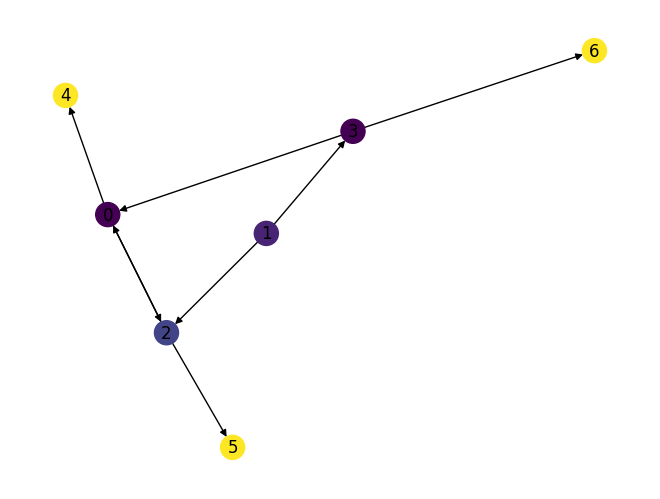

{0: {-1.0: [], 4.0: [-1.0], 6.0: [-1.0, 4.0], 5.0: [4.0, 6.0, -1.0]}, 2: {5.0: [4.0], -1.0: [5.0, 4.0], 4.0: [], 6.0: [-1.0, 4.0, 5.0]}, 1: {6.0: [5.0], -1.0: [6.0, 5.0], 5.0: [], 4.0: [5.0, 6.0, -1.0]}} [[[-1.  5.]
  [-1.  5.]]

 [[-1.  5.]
  [ 6.  6.]]

 [[ 4.  5.]
  [ 4.  4.]]

 [[ 4.  5.]
  [ 6.  6.]]] 1


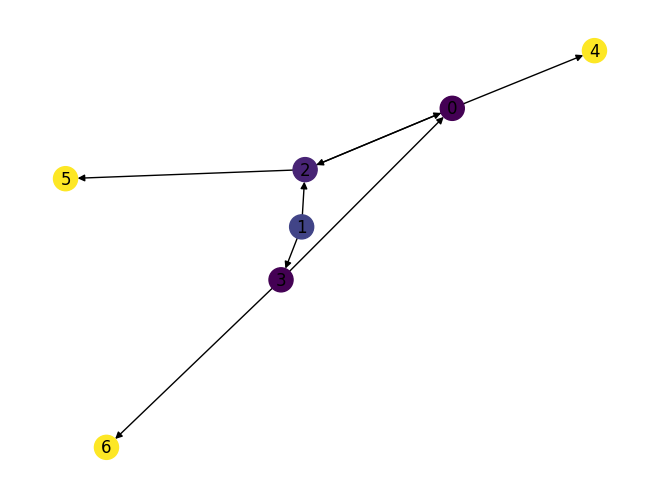

{0: {-1.0: [], 4.0: [-1.0], 6.0: [-1.0, 4.0], 5.0: [4.0, 6.0, -1.0]}, 1: {5.0: [4.0], -1.0: [5.0, 4.0], 4.0: [], 6.0: [-1.0, 4.0, 5.0]}, 2: {6.0: [5.0], -1.0: [6.0, 5.0], 5.0: [], 4.0: [5.0, 6.0, -1.0]}} [[[-1. -1.]
  [ 5.  5.]]

 [[-1.  6.]
  [ 5.  6.]]

 [[ 4.  4.]
  [ 5.  4.]]

 [[ 4.  6.]
  [ 5.  6.]]] 1


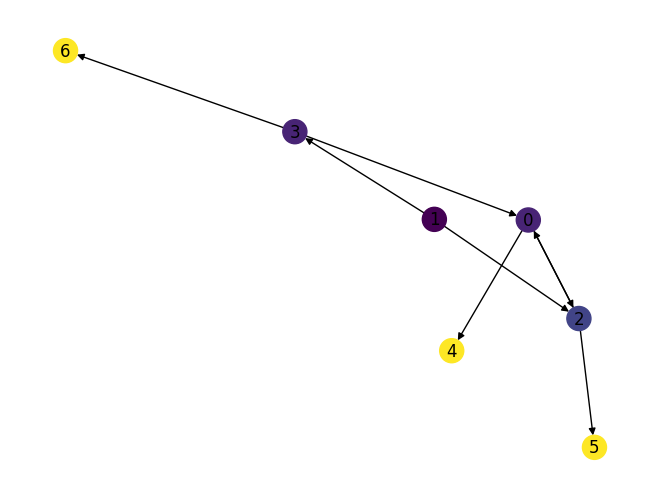

{1: {-1.0: [], 4.0: [-1.0], 6.0: [-1.0, 4.0], 5.0: [4.0, 6.0, -1.0]}, 2: {5.0: [4.0], -1.0: [5.0, 4.0], 4.0: [], 6.0: [-1.0, 4.0, 5.0]}, 0: {6.0: [5.0], -1.0: [6.0, 5.0], 5.0: [], 4.0: [5.0, 6.0, -1.0]}} [[[-1.  5.]
  [-1.  5.]
  [ 4.  5.]
  [ 4.  5.]]

 [[-1.  5.]
  [ 6.  6.]
  [ 4.  4.]
  [ 6.  6.]]] 1


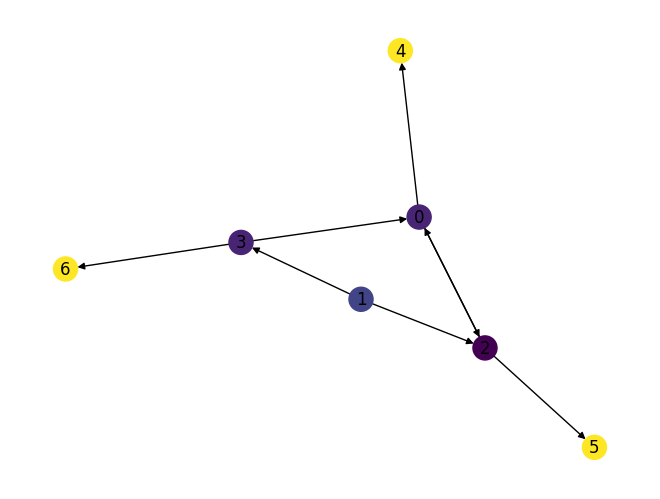

{0: {5.0: [4.0], -1.0: [5.0, 4.0], 4.0: [], 6.0: [-1.0, 4.0, 5.0]}, 1: {-1.0: [], 4.0: [-1.0], 6.0: [-1.0, 4.0], 5.0: [4.0, 6.0, -1.0]}, 2: {6.0: [5.0], -1.0: [6.0, 5.0], 4.0: [6.0, 5.0, -1.0], 5.0: []}} [[[-1. -1.]
  [-1.  6.]
  [ 4.  4.]
  [ 4.  6.]]

 [[ 5.  5.]
  [ 5.  6.]
  [ 5.  4.]
  [ 5.  6.]]] 1


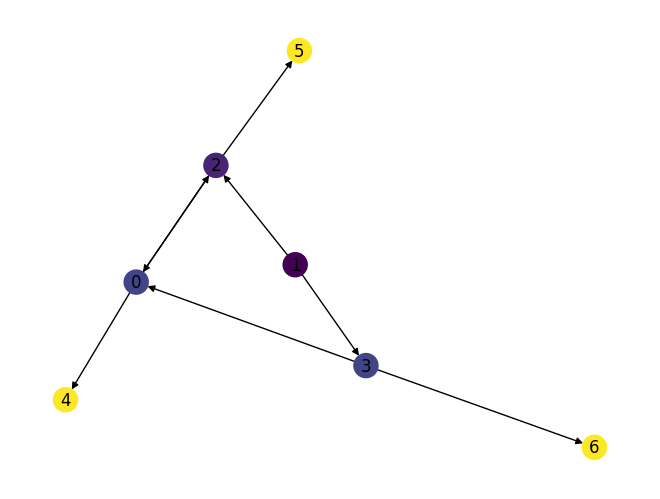

{1: {5.0: [4.0], -1.0: [5.0, 4.0], 4.0: [], 6.0: [-1.0, 4.0, 5.0]}, 2: {-1.0: [], 4.0: [-1.0], 6.0: [-1.0, 4.0], 5.0: [4.0, 6.0, -1.0]}, 0: {6.0: [5.0], -1.0: [6.0, 5.0], 4.0: [6.0, 5.0, -1.0], 5.0: []}} [[[-1. -1.  4.  4.]
  [ 5.  5.  5.  5.]]

 [[-1.  6.  4.  6.]
  [ 5.  6.  4.  6.]]] 1


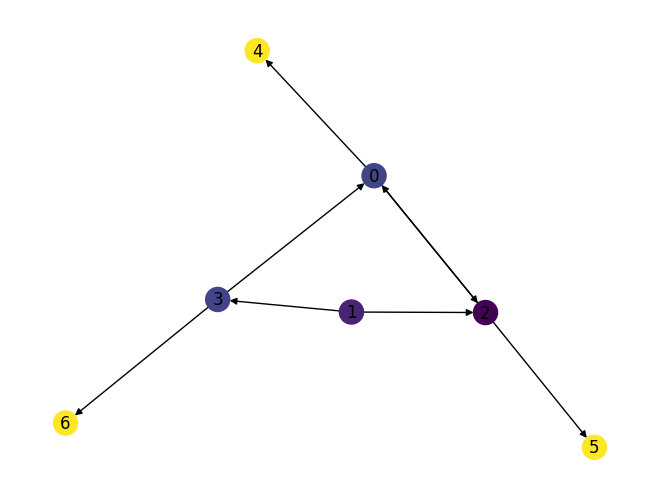

{0: {5.0: [4.0], -1.0: [5.0, 4.0], 4.0: [], 6.0: [-1.0, 4.0, 5.0]}, 2: {-1.0: [], 4.0: [-1.0], 6.0: [-1.0, 4.0], 5.0: [4.0, 6.0, -1.0]}, 1: {6.0: [5.0], -1.0: [6.0, 5.0], 4.0: [6.0, 5.0, -1.0], 5.0: []}} [[[-1. -1.  4.  4.]
  [-1.  6.  4.  6.]]

 [[ 5.  5.  5.  5.]
  [ 5.  6.  4.  6.]]] 1
4 7


In [8]:
wtf2 = []
for i in results:
    wtf = []
    for orders in i.payoffs.values():
        wtf.append(len(orders.get(-1)))
    wtf2.append(sum(wtf))
    connected_terminals = list(map(int, sorted(np.unique(i.round_table))))
    connected_terminals.remove(-1)
    if sum(wtf) == 4 and str(connected_terminals) == str(sorted(i.graph.get_terminals())):
        i.graph.demonstrate(with_labels=True)
        print(i.payoffs, i.round_table, i.v0)

print(min(wtf2), max(wtf2))

In [3]:
import pickle
with open('/home/dtikhanovskii/all_games_without_nash_eq_4.pkl', 'rb') as inp:
    results = pickle.load(inp)

In [4]:
results